In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
%matplotlib widget

# Data Colonias

In [3]:
path_col_data="data/Colonias/mgpc_2019.dbf"
df_col = gpd.read_file(path_col_data)

In [4]:
len(df_col.columns),df_col.columns

(9,
 Index(['ENT', 'CVEDT', 'NOMDT', 'DTTOLOC', 'CVEUT', 'NOMUT', 'POB2010', 'ID',
        'geometry'],
       dtype='object'))

In [5]:
df_col.head(2)

ENT CVEDT         NOMDT DTTOLOC   CVEUT     NOMUT POB2010  ID  \
0   9     2  AZCAPOTZALCO      05  02-001  AGUILERA    2014   1   
1   9     2  AZCAPOTZALCO      05  02-002    ALDANA    3378   2   

                                            geometry  
0  POLYGON ((483311.618 2153254.848, 483332.006 2...  
1  POLYGON ((484406.956 2153012.331, 484401.132 2...

In [6]:
# Add notations of colonias in map
# axis = df_col.plot(color="lightblue",edgecolor = "black",figsize = (12,12))
# for i,k,l in zip(df_col["NOMUT"],df_col.centroid.x,df_col.centroid.y):
#     axis.annotate(i, (k, l), fontsize=4)

In [7]:
col_var_sele=["NOMUT","ID","geometry"]
df_col_selec=df_col[col_var_sele]

In [8]:
# Cambiamos el formato 
df_col_43=df_col_selec.to_crs(epsg=4326)

In [9]:
df_col_43

NOMUT    ID  \
0                   AGUILERA     1   
1                     ALDANA     2   
2              ANGEL ZIMBRON     3   
3                     ARENAL     4   
4     CENTRO DE AZCAPOTZALCO     5   
...                      ...   ...   
1810       VILLA PROGRESISTA  1811   
1811       VILLA SOLIDARIDAD  1812   
1812            VILLA VERDUN  1813   
1813           ZENON DELGADO  1814   
1814              ZOTOLTITLA  1815   

                                               geometry  
0     POLYGON ((-99.15901 19.47374, -99.15882 19.473...  
1     POLYGON ((-99.14858 19.47156, -99.14863 19.471...  
2     POLYGON ((-99.19044 19.47144, -99.19031 19.471...  
3     POLYGON ((-99.15187 19.46803, -99.15186 19.468...  
4     POLYGON ((-99.18959 19.48519, -99.18946 19.485...  
...                                                 ...  
1810  POLYGON ((-99.24369 19.35705, -99.24358 19.357...  
1811  POLYGON ((-99.21851 19.38293, -99.21861 19.382...  
1812  POLYGON ((-99.25629 19.34239, -99.25639 19.342...  
1813  POLYGON ((-99.21591 19.39240, -99.21585 19.392...  
1814  POLYGON ((-99.23647 19.35139, -99.23626 19.351...  

[1815 rows x 3 columns]

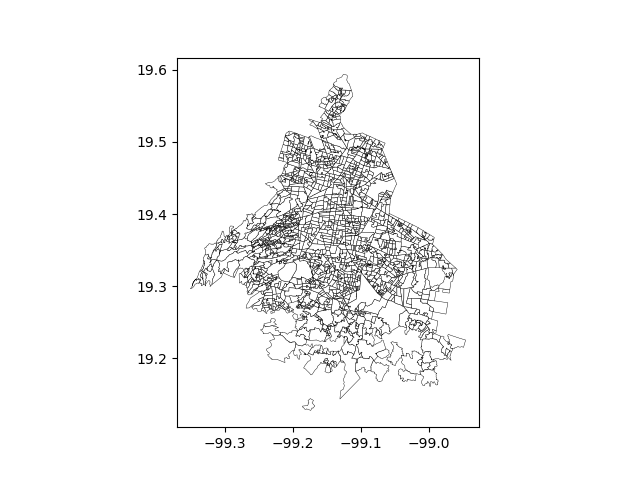

In [10]:
# Setup figure and axis
f, ax = plt.subplots(1)
df_col_43.plot(ax=ax, facecolor='grey', linewidth=0.3, color='white', edgecolor='black')
plt.show()

# Data Mercados

In [11]:
path_merca="data/Mercados/MERCADOS_ADIP.shp"
df_merc = gpd.read_file(path_merca)

In [12]:
df_merc.head(2)

N°    DELEGACION       MERCADO  NUM_OFIC  NUM_LOCALE       Coord_Y  \
0  18.0  AZCAPOTZALCO  AZCAPOTZALCO      35.0       546.0  2.154268e+06   
1  20.0  AZCAPOTZALCO      CLAVERIA      46.0        98.0  2.152290e+06   

        Coord_X                                 DIRECCION       COLONIA  \
0  480539.52674  AV. AZCAPOTZALCO ENTRE ESPERANZA Y RAYON  AZCAPOTZALCO   
1  480987.33324                   IRAPUATO Y CLAVERIA S/N      CLAVERIA   

          TIPO  ...  ANTIGÜEDA  VOCACIÓN  DETALLE   FORMA NIVELES  TAMAÑO1  \
0  TRADICIONAL  ...       63.0       N/D      N/D  CUADRO       1  MEDIANO   
1  TRADICIONAL  ...       73.0       N/D      N/D  CUADRO       1    CHICO   

  PROTEGIDO COORGEOG_X COORGEOG_Y                              geometry  
0        SI -99.185439  19.482872  POINT Z (-99.18544 19.48287 0.00000)  
1        NO -99.181152  19.465003  POINT Z (-99.18115 19.46500 0.00000)  

[2 rows x 22 columns]

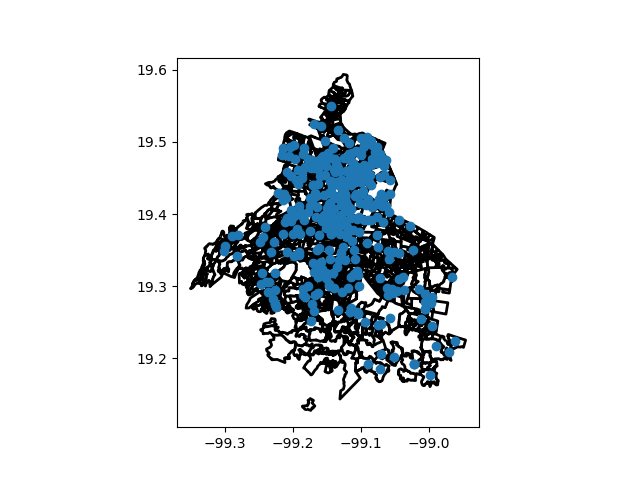

In [13]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
df_col_43.plot(ax=ax, facecolor='grey', linewidth=2, color='white', edgecolor='black')
df_merc.plot(ax=ax)
# Display
plt.show()

In [14]:
df_merc["COLONIA"].value_counts()

CENTRO                      13
MERCED CENTRO                9
MORELOS                      6
PEDREGAL SANTO DOMINGO       4
JAMAICA                      3
                            ..
AMP. AGRICOLA ORIENTAL       1
EL RODEO                     1
EJIDO MAGDALENA MIXIHUCA     1
BARRIO SAN MIGUEL            1
LOMAS DE PADIERNA SUR        1
Name: COLONIA, Length: 263, dtype: int64

## 1) Join : Ubicación de los mercados en las Colonias 

In [15]:
joined_df = gpd.sjoin(
    df_merc,
    df_col_43,
    how='inner',
    op='intersects',
)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Diego\AppData\Local\Temp\ipykernel_3056\3764943374.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:8992
Right CRS: EPSG:4326

  joined_df = gpd.sjoin(


In [16]:
joined_df.head(2)

N°    DELEGACION       MERCADO  NUM_OFIC  NUM_LOCALE       Coord_Y  \
0  18.0  AZCAPOTZALCO  AZCAPOTZALCO      35.0       546.0  2.154268e+06   
1  20.0  AZCAPOTZALCO      CLAVERIA      46.0        98.0  2.152290e+06   

        Coord_X                                 DIRECCION       COLONIA  \
0  480539.52674  AV. AZCAPOTZALCO ENTRE ESPERANZA Y RAYON  AZCAPOTZALCO   
1  480987.33324                   IRAPUATO Y CLAVERIA S/N      CLAVERIA   

          TIPO  ...   FORMA  NIVELES  TAMAÑO1 PROTEGIDO COORGEOG_X COORGEOG_Y  \
0  TRADICIONAL  ...  CUADRO        1  MEDIANO        SI -99.185439  19.482872   
1  TRADICIONAL  ...  CUADRO        1    CHICO        NO -99.181152  19.465003   

                               geometry index_right                   NOMUT  \
0  POINT Z (-99.18544 19.48287 0.00000)           4  CENTRO DE AZCAPOTZALCO   
1  POINT Z (-99.18115 19.46500 0.00000)           5                CLAVERIA   

   ID  
0   5  
1   6  

[2 rows x 25 columns]

In [17]:
count_merc=joined_df["ID"].value_counts().reset_index().rename(columns = {'index':'ID', 'ID':'N_Mercados'})

In [18]:
count_merc.head(2)

ID  N_Mercados
0  1428           9
1   425           4

In [19]:
df_col_merc = pd.merge(df_col_43, count_merc, how="left", on="ID")

In [20]:
def conver_nan(x):
    try:
        return int(x)
    except:
        return 0
df_col_merc["N_Mercados"]=df_col_merc["N_Mercados"].apply(conver_nan)

In [21]:
df_col_merc.head(4)

NOMUT  ID                                           geometry  \
0       AGUILERA   1  POLYGON ((-99.15901 19.47374, -99.15882 19.473...   
1         ALDANA   2  POLYGON ((-99.14858 19.47156, -99.14863 19.471...   
2  ANGEL ZIMBRON   3  POLYGON ((-99.19044 19.47144, -99.19031 19.471...   
3         ARENAL   4  POLYGON ((-99.15187 19.46803, -99.15186 19.468...   

   N_Mercados  
0           0  
1           0  
2           0  
3           1

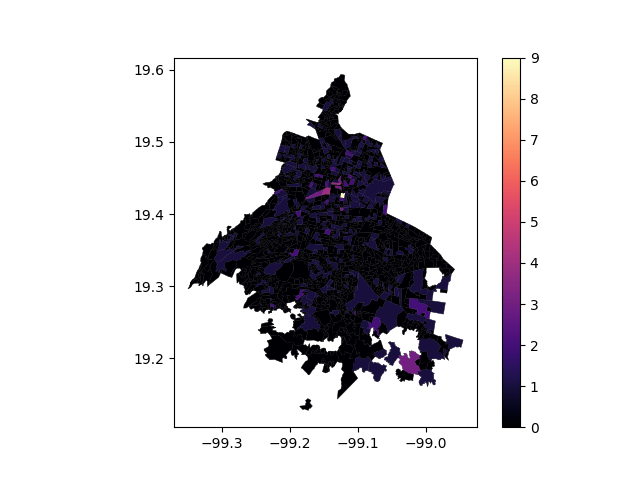

In [22]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
df_col_43.plot(ax=ax, facecolor='grey', linewidth=0.3, color='white', edgecolor='black')
# Add a layer with lines on top in axis `ax`
# boscut_snap.head(600).plot(ax=ax, column = 'NOMUT', cmap = 'gist_rainbow')
df_col_merc.plot(ax=ax, column = 'N_Mercados',cmap='magma',legend=True, )
# df_merc.plot(ax=ax, alpha=0.3)
# Display
plt.show()

#  Data Manzanas

In [23]:
path_mza="data/09_Manzanas_INV2020_shp/INV2020_IND_PVEU_MZA_09.shp"
df_mza = gpd.read_file(path_mza)

In [24]:
"Cantidad de Variables: " + str(len(df_mza.columns)),df_mza.columns

('Cantidad de Variables: 94',
 Index(['CVEGEO', 'CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'CVE_LOC',
        'NOM_LOC', 'CVE_AGEB', 'CVE_MZA', 'AMBITO', 'TIPOMZA', 'POBTOT',
        'POBFEM', 'PPOBFEM', 'POBMAS', 'PPOMAS', 'POB0_14', 'POB0_14_P',
        'P15A29A', 'P15A29A_P', 'P30A59A', 'P30A59A_P', 'P_60YMAS',
        'P_60YMAS_P', 'P_CD_T', 'P_CD_P', 'GRAPROES', 'GRAPROES_F',
        'GRAPROES_M', 'VIVTOT', 'VIVPAR', 'VIVPAR_P', 'TVIPAHAB', 'TVIPAHAB_P',
        'VIVNOHAB', 'VIVNOHAB_P', 'PROM_OCUP', 'PRO_OCUP_C', 'V3MASOCU',
        'V3MASOCU_P', 'VPH_PIDT', 'VPH_PIDT_P', 'VPH_C_EL', 'VPH_C_EL_P',
        'VPH_EXSA', 'VPH_EXSA_P', 'VPH_DREN', 'VPH_DREN_P', 'RECUCALL_C',
        'RAMPAS_C', 'PASOPEAT_C', 'BANQUETA_C', 'GUARNICI_C', 'CICLOVIA_C',
        'CICLOCAR_C', 'ALUMPUB_C', 'LETRERO_C', 'TELPUB_C', 'ARBOLES_C',
        'SEMAPEAT_C', 'SEMAAUDI_C', 'PARATRAN_C', 'ESTABICI_C', 'DRENAJEP_C',
        'TRANSCOL_C', 'ACESOPER_C', 'ACESOAUT_C', 'PUESSEMI_C', 'PUESAMBU_C',
        '

In [25]:
# sele_var=["P30A59A","GRAPROES","TVIPAHAB","CICLOVIA_C","ESTABICI_C","TRANSCOL_C","PUESAMBU_C"]

sele_var=["P30A59A","GRAPROES","TVIPAHAB","geometry"]
df_maza_sv=df_mza[sele_var]

In [26]:
df_maza_sv.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 66386 entries, 0 to 66385
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   P30A59A   66386 non-null  object  
 1   GRAPROES  66386 non-null  object  
 2   TVIPAHAB  66386 non-null  object  
 3   geometry  66386 non-null  geometry
dtypes: geometry(1), object(3)
memory usage: 2.0+ MB


In [27]:
df_maza_sv.isna().sum()

P30A59A     0
GRAPROES    0
TVIPAHAB    0
geometry    0
dtype: int64

In [28]:
df_mza_43=df_maza_sv.to_crs(epsg=4326)

In [29]:
df_mza_clean=df_mza_43[df_mza_43.applymap(lambda x: x ==np.nan if x=="*" else x==x )].dropna()

In [30]:
df_mza_clean["P30A59A"].isnull().sum()

0

In [31]:
def to_number(x):
    try:
        try:
            return int(x)
        except:
            return float(x)
    except:
        # print(x)
        pass
    
df_mza_clean["P30A59A"]=df_mza_clean["P30A59A"].apply(to_number)
df_mza_clean["GRAPROES"]=df_mza_clean["GRAPROES"].apply(to_number)
df_mza_clean["TVIPAHAB"]=df_mza_clean["TVIPAHAB"].apply(to_number)

In [32]:
df_mza_clean=df_mza_clean.dropna()

In [33]:
df_mza_clean.head(2)

P30A59A  GRAPROES  TVIPAHAB  \
0     36.0     10.57      23.0   
2     52.0     10.59      33.0   

                                            geometry  
0  POLYGON ((-99.22982 19.35939, -99.23058 19.358...  
2  POLYGON ((-99.24577 19.37776, -99.24593 19.377...

<AxesSubplot: >

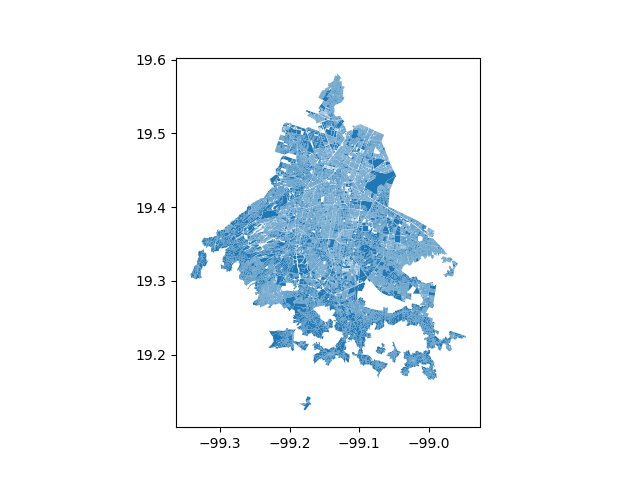

In [34]:
df_mza_clean.plot()

## 2) Join : Manzanas en las colonias 

In [35]:
joined_df_mza_result = gpd.sjoin(
    df_mza_clean,
   df_col_43,
    how='inner',
    op='intersects',
)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [36]:
joined_df_mza_result.head(2)

P30A59A  GRAPROES  TVIPAHAB  \
0       36.0     10.57      23.0   
175     45.0     11.17      23.0   

                                              geometry  index_right  \
0    POLYGON ((-99.22982 19.35939, -99.23058 19.358...         1655   
175  POLYGON ((-99.23003 19.35814, -99.22992 19.358...         1655   

           NOMUT    ID  
0    HERON PROAL  1656  
175  HERON PROAL  1656

In [37]:
gouup_mza=joined_df_mza_result.groupby("ID").sum().reset_index()[["ID","P30A59A","TVIPAHAB"]]

In [38]:
gouup_mza.head(2)

ID  P30A59A  TVIPAHAB
0   1    827.0     608.0
1   2   1589.0    1133.0

In [39]:
gouup_mza_mean=joined_df_mza_result.groupby("ID").mean().reset_index()[["ID","GRAPROES"]]

In [40]:
gouup_mza_mean.head(2)

ID   GRAPROES
0   1  10.244000
1   2  10.845652

In [41]:
join_col_mer_mza= pd.merge(df_col_merc,gouup_mza, how="left", on="ID")

In [42]:
join_CMM_mean= pd.merge(join_col_mer_mza,gouup_mza_mean, how="left", on="ID")

In [43]:
join_CMM_mean.head(4)

NOMUT  ID                                           geometry  \
0       AGUILERA   1  POLYGON ((-99.15901 19.47374, -99.15882 19.473...   
1         ALDANA   2  POLYGON ((-99.14858 19.47156, -99.14863 19.471...   
2  ANGEL ZIMBRON   3  POLYGON ((-99.19044 19.47144, -99.19031 19.471...   
3         ARENAL   4  POLYGON ((-99.15187 19.46803, -99.15186 19.468...   

   N_Mercados  P30A59A  TVIPAHAB   GRAPROES  
0           0    827.0     608.0  10.244000  
1           0   1589.0    1133.0  10.845652  
2           0   1137.0     867.0  10.765333  
3           1   1748.0    1346.0  10.464286

Text(0.5, 1.0, 'Mercados por Colonias')

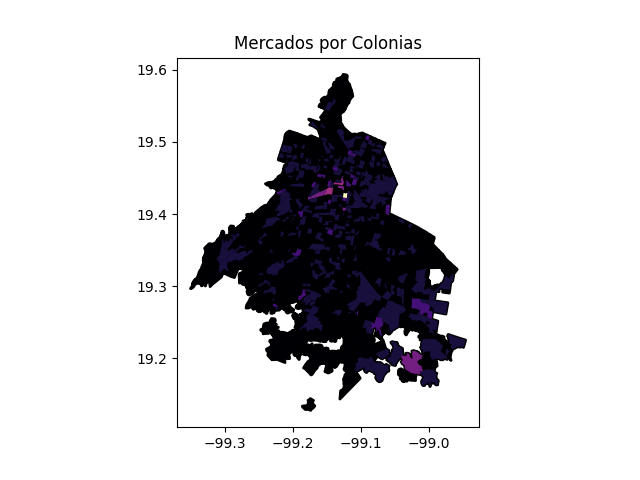

In [44]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
df_col_43.plot(ax=ax, facecolor='grey', linewidth=2, color='white', edgecolor='black')
join_CMM_mean.plot(ax=ax,column="N_Mercados",cmap='magma', )
plt.title('Mercados por Colonias')

Text(0.5, 1.0, 'Población de 30 a 59 años')

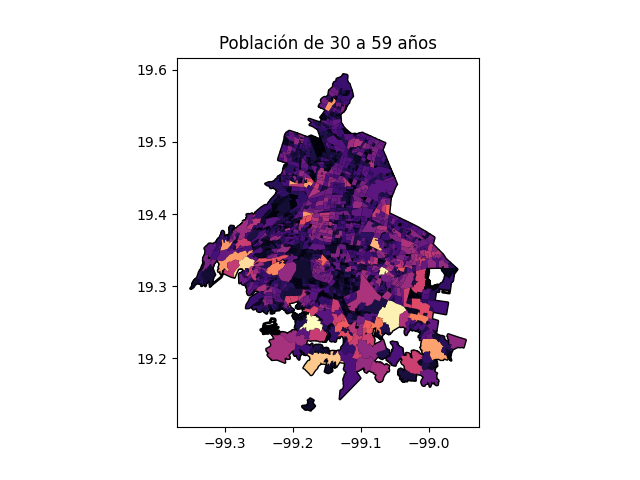

In [45]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
df_col_43.plot(ax=ax, facecolor='grey', linewidth=2, color='white', edgecolor='black')
join_CMM_mean.plot(ax=ax,column="P30A59A",cmap='magma', )
plt.title('Población de 30 a 59 años')

Text(0.5, 1.0, 'Promedio de escolaridad por colonia')

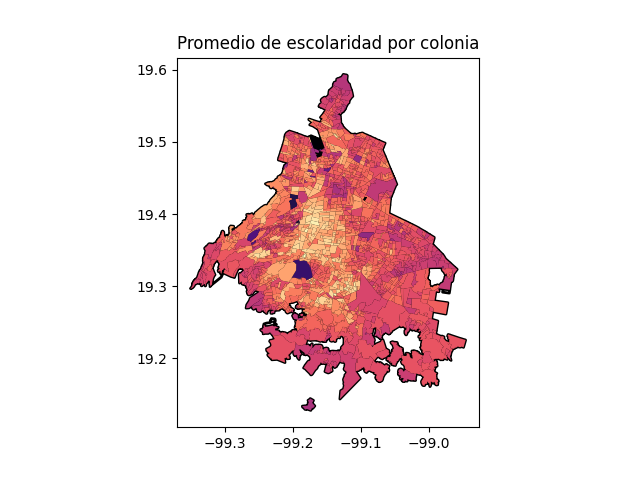

In [46]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
df_col_43.plot(ax=ax, facecolor='grey', linewidth=2, color='white', edgecolor='black')
join_CMM_mean.plot(ax=ax,column="GRAPROES",cmap='magma', )
plt.title('Promedio de escolaridad por colonia')

Text(0.5, 1.0, 'Total de viviendas habitables por colonia')

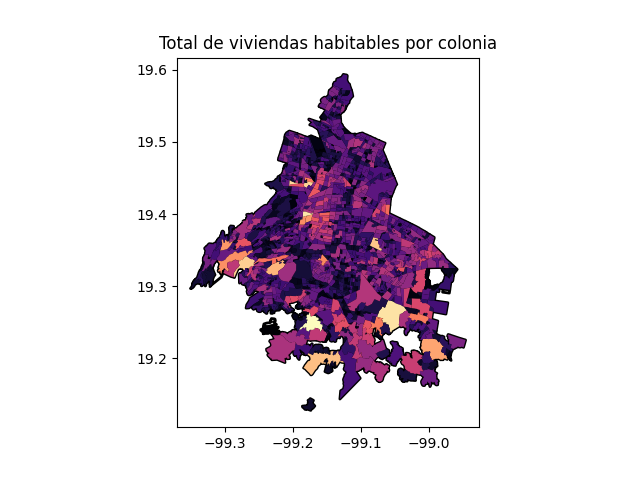

In [47]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
df_col_43.plot(ax=ax, facecolor='grey', linewidth=2, color='white', edgecolor='black')
join_CMM_mean.plot(ax=ax,column="TVIPAHAB",cmap='magma', )
plt.title('Total de viviendas habitables por colonia')

# Data Tianguis

In [48]:
path_tig="data/Tianguis/ubicacin-de-tianguis.json"
df_tig = gpd.read_file(path_tig)

In [49]:
joi_tig_col= gpd.sjoin(
    df_tig,
    df_col_43,
    how='inner',
    op='intersects',
)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [50]:
df_n_tianguis=joi_tig_col["ID"].value_counts().reset_index().rename(columns={"index":"ID","ID":"N_Tianguis"})

## 3) Join : Tianguis en Colonias

In [51]:
result_tig = pd.merge(join_CMM_mean, df_n_tianguis, how="left", on="ID")

In [52]:
result_tig ["N_Tianguis"]=result_tig ["N_Tianguis"].fillna(0)

In [53]:
result_tig.head(2)

NOMUT  ID                                           geometry  \
0  AGUILERA   1  POLYGON ((-99.15901 19.47374, -99.15882 19.473...   
1    ALDANA   2  POLYGON ((-99.14858 19.47156, -99.14863 19.471...   

   N_Mercados  P30A59A  TVIPAHAB   GRAPROES  N_Tianguis  
0           0    827.0     608.0  10.244000         0.0  
1           0   1589.0    1133.0  10.845652         1.0

Text(0.5, 1.0, 'Total Tianguis por colonia')

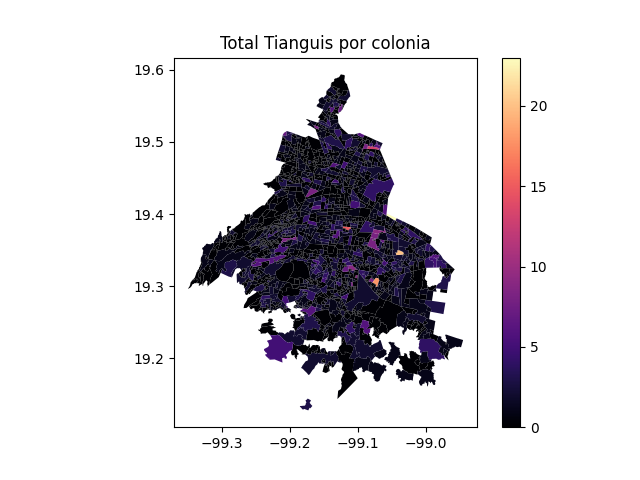

In [54]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
df_col_43.plot(ax=ax, facecolor='grey', linewidth=2, color='white', edgecolor='white')
result_tig .plot(ax=ax,column="N_Tianguis",cmap='magma',legend=True, )
plt.title('Total Tianguis por colonia')

# Data Concentración Habitacional 

In [55]:
path_conce="data/Alta_Concentración/alta_concentracion/zonas_vivienda.shp"
df_concen = gpd.read_file(path_conce)

In [56]:
# Cambiamos el formato 
df_concen=df_concen.to_crs(epsg=4326)

In [57]:
df_concen

grado  ID  \
0  Muy baja concentración habitacional   1   
1      Baja concentración habitacional   2   
2     Media concentración habitacional   3   
3      Alta concentración habitacional   4   
4  Muy alta concentración habitacional   5   

                                            geometry  
0  MULTIPOLYGON (((-99.07025 19.18079, -99.06992 ...  
1  MULTIPOLYGON (((-99.03187 19.18061, -99.02917 ...  
2  MULTIPOLYGON (((-99.07120 19.18441, -99.07087 ...  
3  MULTIPOLYGON (((-99.08827 19.24682, -99.08707 ...  
4  MULTIPOLYGON (((-99.22984 19.27355, -99.23017 ...

<AxesSubplot: >

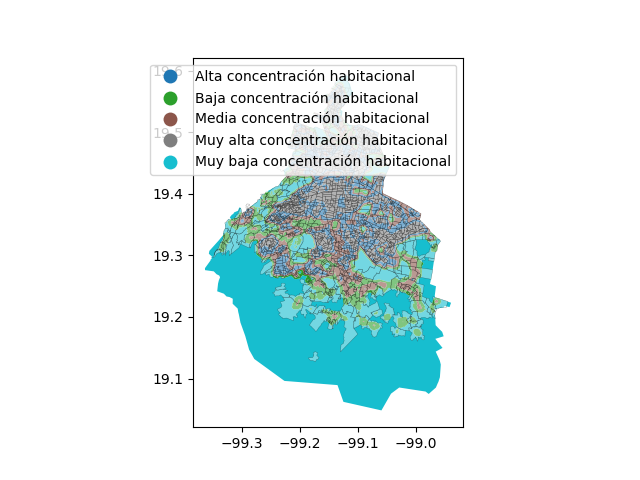

In [58]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
df_concen.plot(ax=ax, column="grado",legend=True,  alpha=1 )
df_col_43.plot(ax=ax, facecolor='grey', linewidth=0.3, color='white', edgecolor='black', alpha=0.4 )

In [59]:
joi_conce_col= gpd.sjoin(
    df_concen,
    df_col_43,
    how='inner',
    op='intersects',
)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [60]:
joi_conce_col.head(10)

grado  ID_left  \
0  Muy baja concentración habitacional        1   
1      Baja concentración habitacional        2   
0  Muy baja concentración habitacional        1   
1      Baja concentración habitacional        2   
2     Media concentración habitacional        3   
0  Muy baja concentración habitacional        1   
1      Baja concentración habitacional        2   
2     Media concentración habitacional        3   
0  Muy baja concentración habitacional        1   
1      Baja concentración habitacional        2   

                                            geometry  index_right  \
0  MULTIPOLYGON (((-99.07025 19.18079, -99.06992 ...         1530   
1  MULTIPOLYGON (((-99.03187 19.18061, -99.02917 ...         1530   
0  MULTIPOLYGON (((-99.07025 19.18079, -99.06992 ...         1523   
1  MULTIPOLYGON (((-99.03187 19.18061, -99.02917 ...         1523   
2  MULTIPOLYGON (((-99.07120 19.18441, -99.07087 ...         1523   
0  MULTIPOLYGON (((-99.07025 19.18079, -99.06992 ...         1506   
1  MULTIPOLYGON (((-99.03187 19.18061, -99.02917 ...         1506   
2  MULTIPOLYGON (((-99.07120 19.18441, -99.07087 ...         1506   
0  MULTIPOLYGON (((-99.07025 19.18079, -99.06992 ...         1174   
1  MULTIPOLYGON (((-99.03187 19.18061, -99.02917 ...         1174   

                               NOMUT  ID_right  
0  SAN FRANCISCO TLALNEPANTLA (PBLO)      1531  
1  SAN FRANCISCO TLALNEPANTLA (PBLO)      1531  
0        SAN ANDRES AHUAYUCAN (PBLO)      1524  
1        SAN ANDRES AHUAYUCAN (PBLO)      1524  
2        SAN ANDRES AHUAYUCAN (PBLO)      1524  
0                          LA CONCHA      1507  
1                          LA CONCHA      1507  
2                          LA CONCHA      1507  
0     SAN SALVADOR CUAUHTENCO (PBLO)      1175  
1     SAN SALVADOR CUAUHTENCO (PBLO)      1175

# Data comerciantes

In [61]:
path_comerci="data/Comerciantes/comerciantes.json"
df_comerci = gpd.read_file(path_comerci)

In [62]:
df_comerci.head(2)

CONS_SEDEC                      CENTRO_DE        ALCALDÍA  \
0         1.0  Concentración de comerciantes  Álvaro Obregón   
1         2.0  Concentración de comerciantes  Álvaro Obregón   

                                        MERCADO  NUM_OF  \
0  Ampliación  La  Mexicana o Plaza La Mexicana     1.0   
1                            Ampliación Aguilas     2.0   

                                           DIRECCION    COORD_X     COORD_Y  \
0  Av. Vasco de Quiroga entre Paso de la Nieve y ...  475793.99  2143328.64   
1  Calz. Las Aguilas y Cda. Tarango col. Ampliaci...       0.00        0.00   

  OBSERVACI   F10   F11                    geometry  
0      None  None  None  POINT (-99.23052 19.38396)  
1      None  None  None                        None

In [63]:
joi_comer_col= gpd.sjoin(
    df_comerci,
    df_col_43,
    how='inner',
    op='intersects',
)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [64]:
joi_comer_col.head(2)

CONS_SEDEC                      CENTRO_DE        ALCALDÍA  \
0         1.0  Concentración de comerciantes  Álvaro Obregón   
2         3.0  Concentración de comerciantes  Álvaro Obregón   

                                        MERCADO  NUM_OF  \
0  Ampliación  La  Mexicana o Plaza La Mexicana     1.0   
2                                  Barrio Norte     3.0   

                                           DIRECCION    COORD_X     COORD_Y  \
0  Av. Vasco de Quiroga entre Paso de la Nieve y ...  475793.99  2143328.64   
2  Mina de Platino entre Av. Benito Juárez y Av. ...  478178.72  2142767.43   

  OBSERVACI   F10   F11                    geometry  index_right  \
0      None  None  None  POINT (-99.23052 19.38396)         1676   
2      None  None  None  POINT (-99.20780 19.37891)         1592   

          NOMUT    ID  
0   LA MEXICANA  1677  
2  BARRIO NORTE  1593

In [65]:
df_n_comerci=joi_comer_col["ID"].value_counts().reset_index().rename(columns={"index":"ID","ID":"N_Comerci"})

In [66]:
df_n_comerci.head(2)

ID  N_Comerci
0  389          5
1  962          4

## 4) Join : Comerciantes en Colonias

In [67]:
result_comerci = pd.merge(result_tig , df_n_comerci, how="left", on="ID")

In [68]:
result_comerci ["N_Comerci"]=result_comerci["N_Comerci"].fillna(0)

In [69]:
result_comerci.head(2)

NOMUT  ID                                           geometry  \
0  AGUILERA   1  POLYGON ((-99.15901 19.47374, -99.15882 19.473...   
1    ALDANA   2  POLYGON ((-99.14858 19.47156, -99.14863 19.471...   

   N_Mercados  P30A59A  TVIPAHAB   GRAPROES  N_Tianguis  N_Comerci  
0           0    827.0     608.0  10.244000         0.0        0.0  
1           0   1589.0    1133.0  10.845652         1.0        0.0

Text(0.5, 1.0, 'Total Comerciantes por colonia')

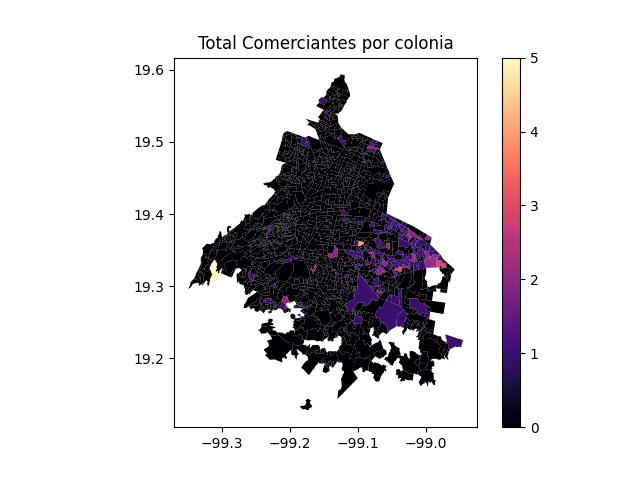

In [70]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
df_col_43.plot(ax=ax, facecolor='grey', linewidth=2, color='white', edgecolor='white')
result_comerci.plot(ax=ax,column="N_Comerci",cmap='magma',legend=True, )
plt.title('Total Comerciantes por colonia')

# Data Concentración de Empleo

In [71]:
path_empleo="data/Concentracion_de_empleo/concentracion_empleo/due_empleo_polygon.shp"
df_empleo = gpd.read_file(path_empleo)

In [72]:
# Cambiamos el formato 
df_empleo =df_empleo .to_crs(epsg=4326)

In [73]:
df_empleo 

VALUE                                           geometry
0    3.0  MULTIPOLYGON (((-99.08049 19.36084, -99.08049 ...
1    4.0  MULTIPOLYGON (((-99.20230 19.30291, -99.20230 ...
2    5.0  MULTIPOLYGON (((-99.10524 19.34998, -99.10619 ...
3    1.0  MULTIPOLYGON (((-98.99956 19.20541, -98.99956 ...
4    2.0  MULTIPOLYGON (((-99.07571 19.31385, -99.07571 ...

<AxesSubplot: >

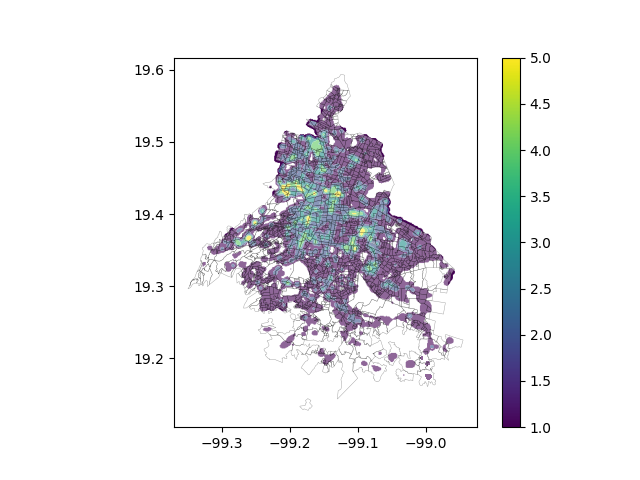

In [74]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
df_empleo.plot(ax=ax, column="VALUE",legend=True,  alpha=1 )
df_col_43.plot(ax=ax, facecolor='grey', linewidth=0.3, color='white', edgecolor='black', alpha=0.4 )

In [75]:
joi_empleo_col= gpd.sjoin(
    df_empleo,
    df_col_43,
    how='inner',
    op='intersects',
)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [76]:
joi_empleo_col.head(2)

VALUE                                           geometry  index_right  \
0    3.0  MULTIPOLYGON (((-99.08049 19.36084, -99.08049 ...          264   
3    1.0  MULTIPOLYGON (((-98.99956 19.20541, -98.99956 ...          264   

        NOMUT   ID  
0  EL MIRADOR  265  
3  EL MIRADOR  265

# 5) Data/Join Concentración Patrimonial

In [77]:
path_patri="data/Concentracion_Patrimonial/Áreas_de_conservación_patrimonial.shp"
df_patri = gpd.read_file(path_patri)

<AxesSubplot: >

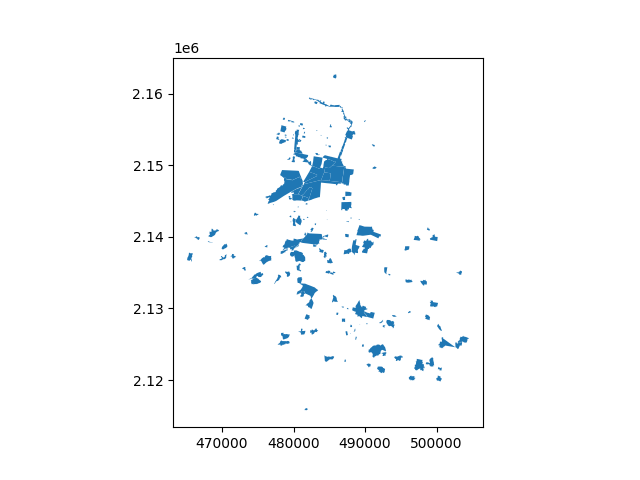

In [78]:
df_patri.plot()

In [79]:
# Cambiamos el formato 
def count_df(path,subfi,last_df):
    subfi=subfi
    df_patri = gpd.read_file(path)
    df_patri =df_patri.to_crs(epsg=4326)
    try:
        df_patri=df_patri.drop(columns=["ID"])
    except:
        pass
    joi_patri_col= gpd.sjoin(
        df_patri,
        df_col_43,
        how='inner',
        op='intersects',
    )
    # df_patri.plot()
    # plt.show()
    # display(joi_patri_col.head(2))
    df_n_prati=joi_patri_col["ID"].value_counts().reset_index().rename(columns={"index":"ID","ID":f"N_{subfi}"})
    result= pd.merge(last_df ,df_n_prati, how="left", on="ID")
    result[f"N_{subfi}"]=result[f"N_{subfi}"].fillna(0)

    return  result

result_patri=count_df(path=path_patri, subfi="Patri", last_df=result_comerci)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\IPython\core\interactiveshell.py:3378: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [80]:
result_patri.head(2)

NOMUT  ID                                           geometry  \
0  AGUILERA   1  POLYGON ((-99.15901 19.47374, -99.15882 19.473...   
1    ALDANA   2  POLYGON ((-99.14858 19.47156, -99.14863 19.471...   

   N_Mercados  P30A59A  TVIPAHAB   GRAPROES  N_Tianguis  N_Comerci  N_Patri  
0           0    827.0     608.0  10.244000         0.0        0.0      0.0  
1           0   1589.0    1133.0  10.845652         1.0        0.0      0.0

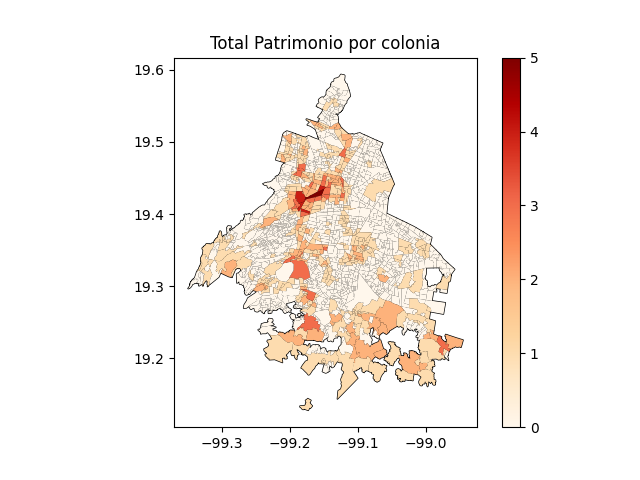

In [81]:
def plot_result(df_result,tipo,colum):
    f, ax = plt.subplots(1)
    df_col_43.plot(ax=ax, facecolor='grey', linewidth=1, color='white', edgecolor='black')
    df_result.plot(ax=ax,column=colum,cmap='OrRd',legend=True, )
    plt.title(f'Total {tipo} por colonia')
    plt.show()
plot_result(df_result=result_patri,tipo="Patrimonio",colum="N_Patri")

# 6) Plazas Publicas

geografico   ID                                           geometry
0      Plaza  1.0  POLYGON ((488315.927 2136007.093, 488381.221 2...
1      Plaza  2.0  POLYGON ((485525.160 2161042.377, 485511.222 2...
2      Plaza  3.0  POLYGON ((482641.999 2158397.148, 482679.804 2...
3      Plaza  4.0  POLYGON ((487332.302 2151785.853, 487344.967 2...
4      Plaza  5.0  POLYGON ((474397.699 2133858.782, 474424.164 2...

48

<AxesSubplot: >

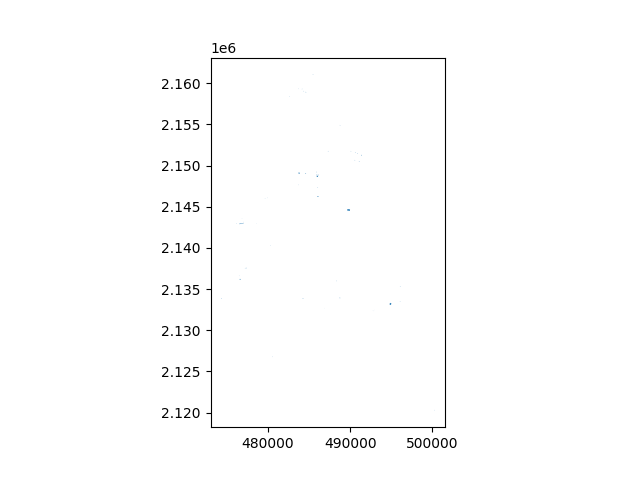

In [82]:
path_plz_public="data/Plazas_publicas/Plazas pu╠üblicas de la Ciudad de Me╠üxico/Plazas_publicas_CDMX.shp"
df= gpd.read_file(path_plz_public)
display(df.head(),len(df))
df.plot()

In [83]:
result_plaza=count_df(path=path_plz_public, subfi="Plaza", last_df=result_patri)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\IPython\core\interactiveshell.py:3378: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [84]:
result_plaza.head(2)

NOMUT  ID                                           geometry  \
0  AGUILERA   1  POLYGON ((-99.15901 19.47374, -99.15882 19.473...   
1    ALDANA   2  POLYGON ((-99.14858 19.47156, -99.14863 19.471...   

   N_Mercados  P30A59A  TVIPAHAB   GRAPROES  N_Tianguis  N_Comerci  N_Patri  \
0           0    827.0     608.0  10.244000         0.0        0.0      0.0   
1           0   1589.0    1133.0  10.845652         1.0        0.0      0.0   

   N_Plaza  
0      0.0  
1      0.0

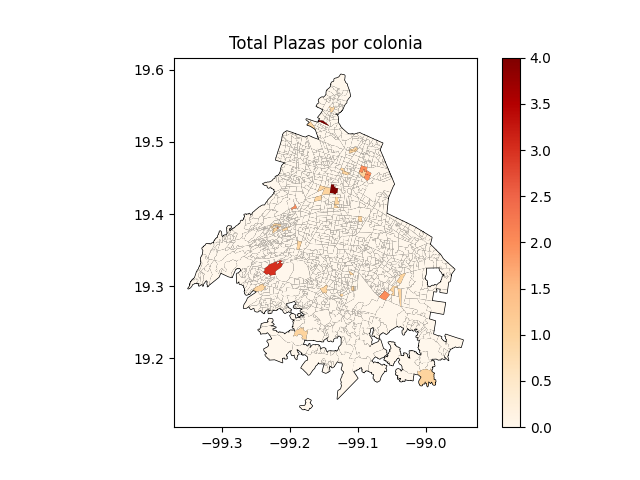

In [85]:
plot_result(df_result=result_plaza,tipo="Plazas",colum="N_Plaza")

# 7) Unidades Economicas 

ue  ind  com  serv      sup_ha  \
0  1960   37  500  1403  312.608615   
1    27    0    7     7   78.368909   
2   129    4   27   101   12.367361   
3   608   49  326   231   58.544747   
4   854   58  400   397   69.043070   

                                            geometry  \
0  POLYGON ((-99.22017 19.42803, -99.22009 19.428...   
1  POLYGON ((-99.22967 19.41406, -99.22970 19.413...   
2  POLYGON ((-99.20821 19.43282, -99.20813 19.432...   
3  POLYGON ((-99.14587 19.31979, -99.14579 19.319...   
4  POLYGON ((-99.15854 19.33038, -99.15785 19.329...   

                                    nombre  
0                     LOMAS DE CHAPULTEPEC  
1  LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC)  
2                     DEL BOSQUE (POLANCO)  
3               PEDREGAL DE SANTA URSULA I  
4                                 AJUSCO I

1812

<AxesSubplot: >

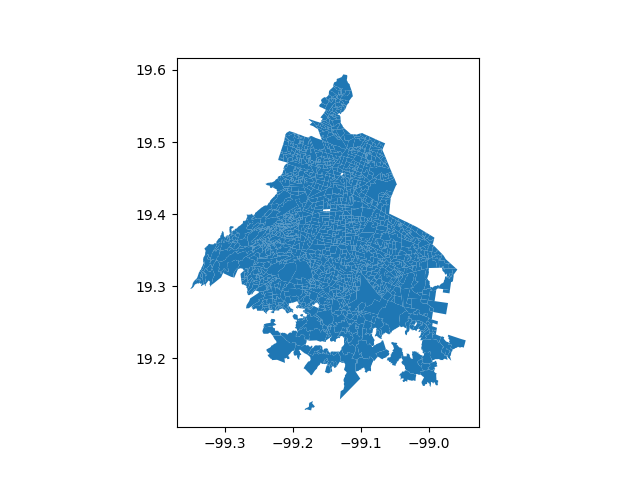

In [86]:
path_uniEco="data/Unidades_economicas/dnue_colonia/colonias_dnue.shp"
df_uniEco= gpd.read_file(path_uniEco)
selec_var_uniEco=["ue","ind","com","serv","sup_ha","geometry","nombre"]
df_uniEco=df_uniEco[selec_var_uniEco]
display(df_uniEco.head(),len(df_uniEco))
df_uniEco.plot()

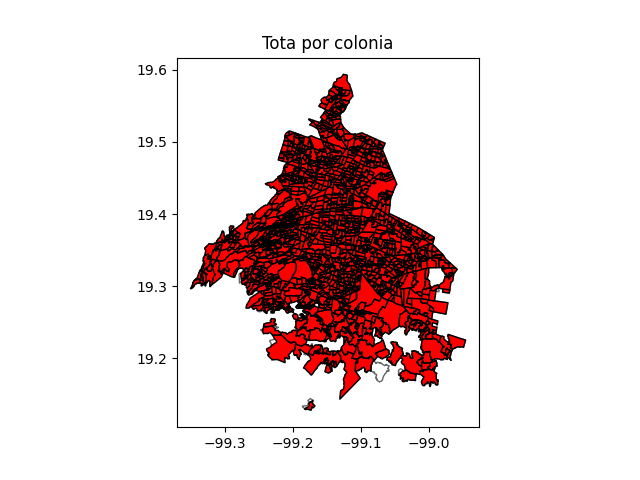

In [87]:
f, ax = plt.subplots(1)
df_col_43.plot(ax=ax, facecolor='grey', linewidth=1, color='white', edgecolor='black',alpha=0.6)
df_uniEco.plot(ax=ax,linewidth=1, color='red', edgecolor='black' )
plt.title(f'Tota por colonia')
plt.show()

In [88]:
joi_uniEco_col= gpd.sjoin(
    df_uniEco,
    df_col_43,
    how='inner',
    op='intersects',
)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [89]:
joi_uniEco_col.head(2)

ue  ind  com  serv      sup_ha  \
0  1960   37  500  1403  312.608615   
1    27    0    7     7   78.368909   

                                            geometry  \
0  POLYGON ((-99.22017 19.42803, -99.22009 19.428...   
1  POLYGON ((-99.22967 19.41406, -99.22970 19.413...   

                                    nombre  index_right  \
0                     LOMAS DE CHAPULTEPEC         1120   
1  LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC)         1120   

                                     NOMUT    ID  
0  LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC)  1121  
1  LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC)  1121

In [90]:
group_uniEco=joi_uniEco_col.groupby("ID").sum().reset_index()[["ID","ue","ind","com","serv","sup_ha"]]

In [91]:
resul_uniEco= pd.merge(result_plaza,group_uniEco, how="left", on="ID")

In [92]:
resul_uniEco.head(2)

NOMUT  ID                                           geometry  \
0  AGUILERA   1  POLYGON ((-99.15901 19.47374, -99.15882 19.473...   
1    ALDANA   2  POLYGON ((-99.14858 19.47156, -99.14863 19.471...   

   N_Mercados  P30A59A  TVIPAHAB   GRAPROES  N_Tianguis  N_Comerci  N_Patri  \
0           0    827.0     608.0  10.244000         0.0        0.0      0.0   
1           0   1589.0    1133.0  10.845652         1.0        0.0      0.0   

   N_Plaza   ue  ind  com  serv     sup_ha  
0      0.0  422   55  191   173  64.508947  
1      0.0  370   30  179   177  46.174779

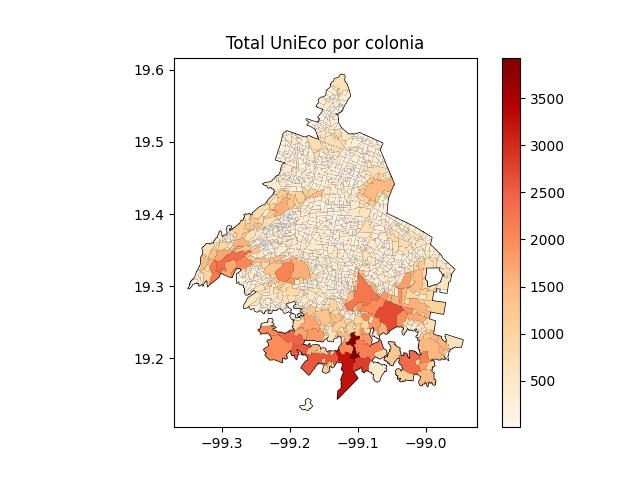

In [93]:
plot_result(df_result=resul_uniEco,tipo="UniEco",colum="sup_ha")

# 8) Tasa de Crecimiento

In [100]:
path_Tcre="data/Tasa_de_crecimiento/tasa_crecimiento_medio/tcma10_20.shp"
df_Tcre= gpd.read_file(path_Tcre)
selec_var_Tcre=["PobTot2010","PobTot2020","DenPob10","DenPob20","colonia","geometry"]
df_Tcre=df_Tcre[selec_var_Tcre]
df_Tcre=df_Tcre.to_crs(epsg=4326)
display(df_Tcre.head(),len(df_uniEco))

PobTot2010  PobTot2020    DenPob10    DenPob20                 colonia  \
0        2014        1957  193.987675  188.497458                AGUILERA   
1        3537        3670  228.479544  237.070944                  ALDANA   
2        2737        2330  112.995046   96.192348           ANGEL ZIMBRON   
3        4817        4306  168.388788  150.525663                  ARENAL   
4        3043        3164   71.691909   74.542622  CENTRO DE AZCAPOTZALCO   

                                            geometry  
0  POLYGON ((-99.15901 19.47374, -99.15882 19.473...  
1  POLYGON ((-99.14858 19.47156, -99.14863 19.471...  
2  POLYGON ((-99.18794 19.46458, -99.18800 19.463...  
3  POLYGON ((-99.15187 19.46803, -99.15186 19.468...  
4  POLYGON ((-99.18959 19.48519, -99.18946 19.485...

1812

In [101]:
df_Tcre["colonia"].value_counts()

LA JOYA                    4
MIGUEL HIDALGO             4
LA ASUNCION (BARR)         3
FRANCISCO VILLA            3
LA JOYITA                  3
                          ..
SAN JOSE TICOMAN           1
SAN JOSE DE LA ESCALERA    1
SAN FELIPE DE JESUS III    1
SAN FELIPE DE JESUS II     1
ZOTOLTITLA                 1
Name: colonia, Length: 1743, dtype: int64

<AxesSubplot: >

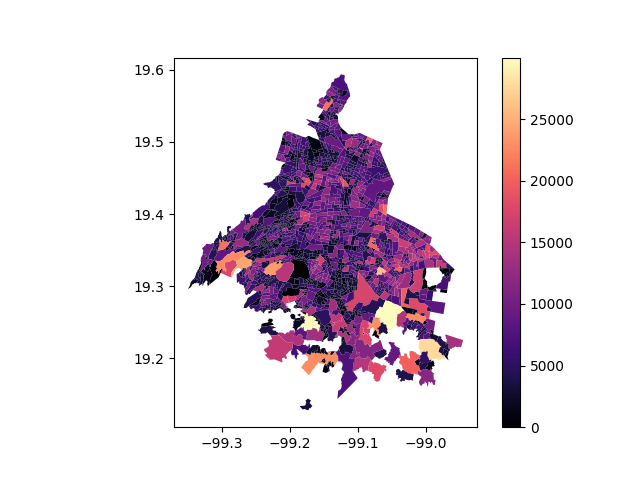

In [169]:
df_Tcre.plot(column="PobTot2020",cmap='magma',legend=True)

In [103]:
joi_Tcre_col= gpd.sjoin(
   df_Tcre,
    df_col_43,
    how='inner',
    op='intersects',
)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [138]:
joi_Tcre_col.head(2)

PobTot2010  PobTot2020    DenPob10    DenPob20   colonia  \
0        2014        1957  193.987675  188.497458  AGUILERA   
1        3537        3670  228.479544  237.070944    ALDANA   

                                            geometry  index_right       NOMUT  \
0  POLYGON ((-99.15901 19.47374, -99.15882 19.473...           39  LIBERACION   
1  POLYGON ((-99.14858 19.47156, -99.14863 19.471...           39  LIBERACION   

   ID  
0  40  
1  40

<AxesSubplot: >

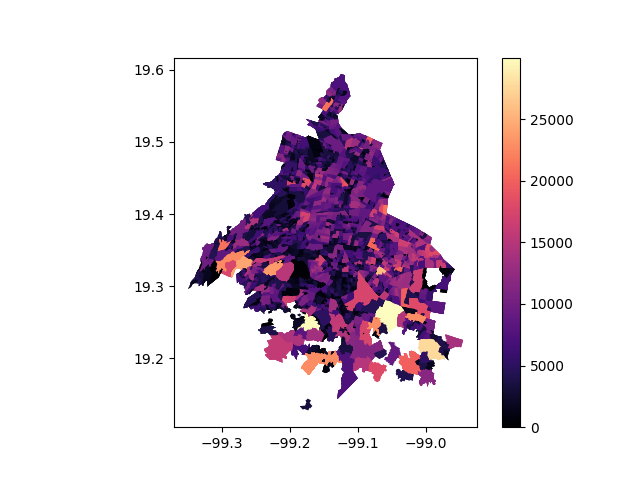

In [162]:
joi_Tcre_col.plot(column="PobTot2020",cmap='magma',legend=True)

In [133]:
group_densi=joi_Tcre_col.groupby("ID").sum().reset_index()[["ID","PobTot2010","PobTot2020","DenPob10","DenPob20"]]

In [134]:
group_densi.head(2)

ID  PobTot2010  PobTot2020     DenPob10     DenPob20
0   1       22799       25858  1074.986969  1168.370900
1   2       12065       12211  1066.847315  1073.005356

In [135]:
group_densi["T_creci_Pobla"]=(group_densi["PobTot2020"]/group_densi["PobTot2010"] -1 )*100

In [136]:
group_densi["T_creci_Densi"]=(group_densi["DenPob20"]/group_densi["DenPob10"] -1 )*100

In [137]:
group_densi.head(2)

ID  PobTot2010  PobTot2020     DenPob10     DenPob20  T_creci_Pobla  \
0   1       22799       25858  1074.986969  1168.370900      13.417255   
1   2       12065       12211  1066.847315  1073.005356       1.210112   

   T_creci_Densi  
0       8.686983  
1       0.577219

In [141]:
group_densi_selec=group_densi[["ID","T_creci_Pobla","T_creci_Densi"]]

In [143]:
group_densi_selec

ID  T_creci_Pobla  T_creci_Densi
0        1      13.417255       8.686983
1        2       1.210112       0.577219
2        3      -2.039881      -6.303142
3        4      39.372442      21.255988
4        5      10.186490      12.982385
...    ...            ...            ...
1810  1811     -18.202374     -17.868024
1811  1812       6.885411      10.534329
1812  1813       8.001929       4.318612
1813  1814      -1.536420      -5.237401
1814  1815      -8.838101     -10.832717

[1815 rows x 3 columns]

In [144]:
resul_PDensi= pd.merge(resul_uniEco,group_densi_selec, how="left", on="ID")

In [155]:
resul_PDensi.head(2)

NOMUT  ID                                           geometry  \
0  AGUILERA   1  POLYGON ((-99.15901 19.47374, -99.15882 19.473...   
1    ALDANA   2  POLYGON ((-99.14858 19.47156, -99.14863 19.471...   

   N_Mercados  P30A59A  TVIPAHAB   GRAPROES  N_Tianguis  N_Comerci  N_Patri  \
0           0    827.0     608.0  10.244000         0.0        0.0      0.0   
1           0   1589.0    1133.0  10.845652         1.0        0.0      0.0   

   N_Plaza   ue  ind  com  serv     sup_ha  T_creci_Pobla  T_creci_Densi  
0      0.0  422   55  191   173  64.508947      13.417255       8.686983  
1      0.0  370   30  179   177  46.174779       1.210112       0.577219

<AxesSubplot: >

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\matplotlib\colors.py:1350: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


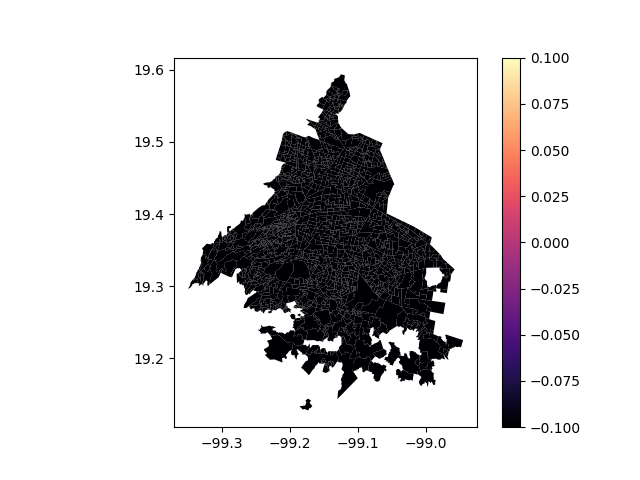

In [159]:
resul_PDensi.plot(column="T_creci_Densi",cmap='magma',legend=True)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\matplotlib\colors.py:1350: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


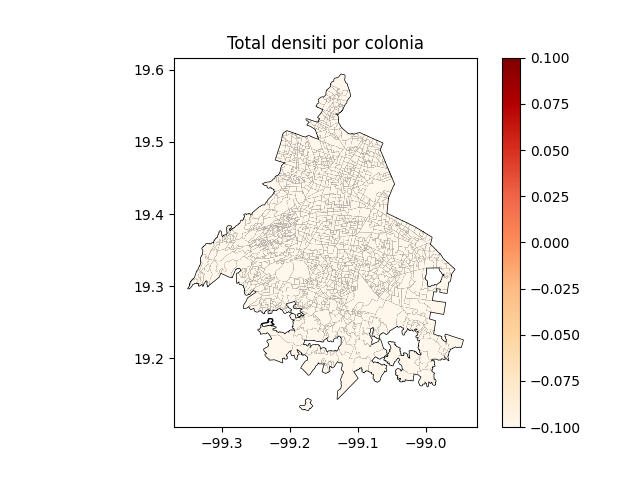

In [147]:
plot_result(df_result=resul_PDensi,tipo="densiti",colum="T_creci_Pobla")

In [172]:
x=resul_uniEco.drop(columns=["NOMUT","ID","geometry"])

In [174]:
x=x.dropna()

In [181]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [182]:
resul_uniEco_na=resul_uniEco.dropna()

In [183]:
resul_uniEco_na["Predict"]=kmeans.labels_

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [189]:
def change_names(x):
    if x==0:
        return "No_gentri"
    elif x==1:
        return "Gentri_proce"
    else:
        return "Gentrificate"
resul_uniEco_na["Labels"]=resul_uniEco_na["Predict"].apply(change_names)

C:\Users\Diego\anaconda3\envs\for_py\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Text(0.5, 1.0, 'Kmeans Selec ')

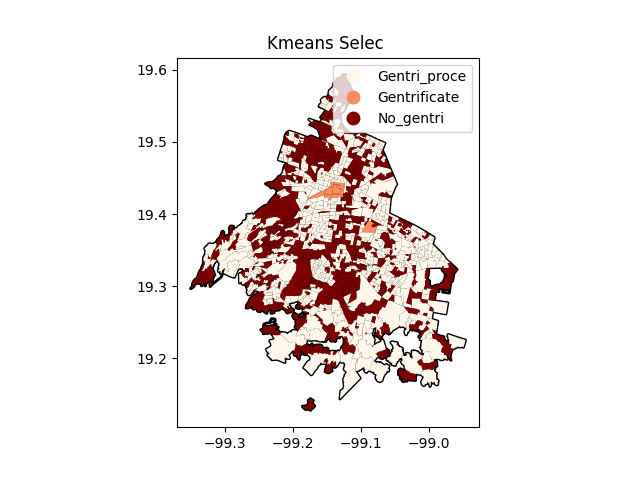

In [194]:

# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygons on to axis `ax`
df_col_43.plot(ax=ax, facecolor='grey', linewidth=2, color='white', edgecolor='black')
resul_uniEco_na.plot(ax=ax,column="Labels",legend=True, cmap='OrRd' ,alpha=1 )
plt.title('Kmeans Selec ')